# Capstone Project - Student Performance in Exams

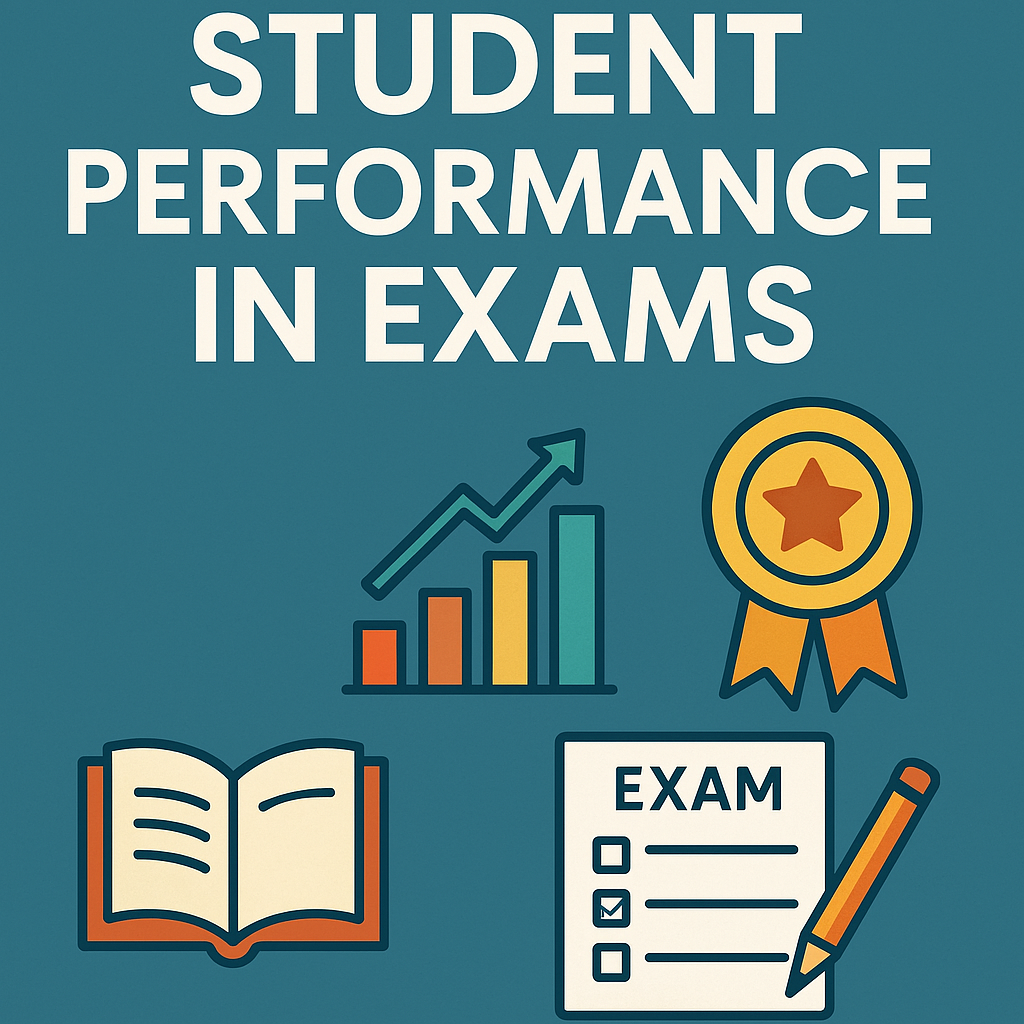

In [1]:
from IPython.display import Image, display

# Display the image
display(Image('Image for Student Performance in Exam.png'))

This project will analyze student performance data to identify factors influencing exam scores and provide actionable insights for educators. The "Student Performance" dataset from Kaggle which contains approximately 1,000 records with attributes like:

a. Demographics: Gender, race/ethnicity
b. Socioeconomic: Parental education, lunch type 
c. Academic: Preparation course, test scores (Math, Reading, Writing)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("exams.csv")

In [4]:
# Dataset dimensions and structure
print("Dataset Dimensions:")
print(df.shape)
print("\nDataset Structure (Data Types and Non-null Counts):")
df.info()

Dataset Dimensions:
(1000, 8)

Dataset Structure (Data Types and Non-null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))


In [6]:
# Data quality assessment 

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Dataset Dimensions and Structure The dataset contains 1000 rows and 8 columns. The columns consist of:

3 numerical features (math score, reading score, writing score) with integer data types.

5 categorical features (gender, race/ethnicity, parental level of education, lunch, test preparation course) with object data types.

Data Quality Assessment There are no missing values in the dataset. All columns have a 1000 non-null count, indicating that the data is complete.

In [7]:
# Descriptive statistics
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())
print("\nDescriptive Statistics for Categorical Features:")
print(df.describe(include='object'))


Descriptive Statistics for Numerical Features:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000

Descriptive Statistics for Categorical Features:
       gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      508            323                         224       660   

       test preparation course  
count                     1000  
unique                       2  
top        

Descriptive Statistics
The descriptive statistics for the numerical and categorical features are as follows:

Numerical Features:
The average scores across all subjects are fairly close, with math score averaging 67.81, reading score at 70.38, and writing score at 69.14.
The standard deviations are also similar, ranging from 14.11 to 15.25, suggesting a moderate spread of scores.
All three subjects have a maximum score of 100. The minimum scores are 15 for math and writing, and 25 for reading.

Categorical Features:
Gender: The dataset has a nearly equal distribution of males and females, with 508 males and 492 females.
Race/ethnicity: Group C has the highest frequency with 323 students, while group A has the lowest with 79 students.
Parental level of education: The most common parental education level is 'some college' (224 students), and the least common is 'master's degree' (75 students).
Lunch: The majority of students (660) have a standard lunch.
Test preparation course: More students (656) did not complete the test preparation course than those who did (344).


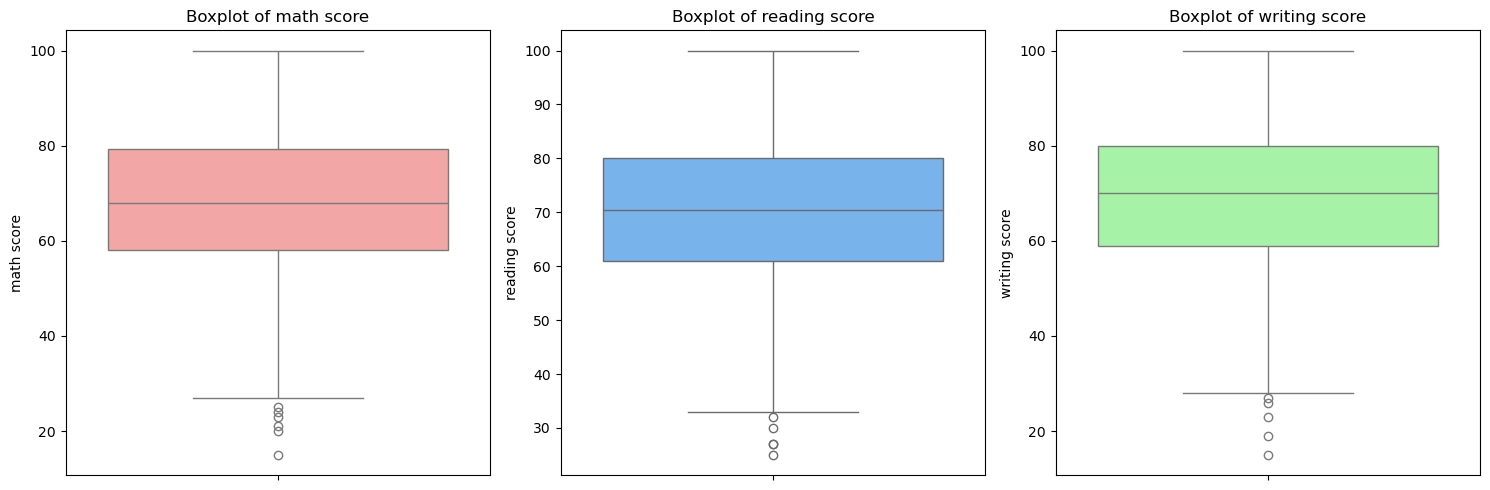

In [8]:
# Outlier detection using boxplots
numerical_features = ['math score', 'reading score', 'writing score']
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[feature], color=colors[i])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('numerical_features_boxplots.png')
plt.show()

Outlier Detection
The box plots show that there are some outliers, particularly in the lower end of the score distributions for all three subjects. A few students have exceptionally low scores compared to the majority.

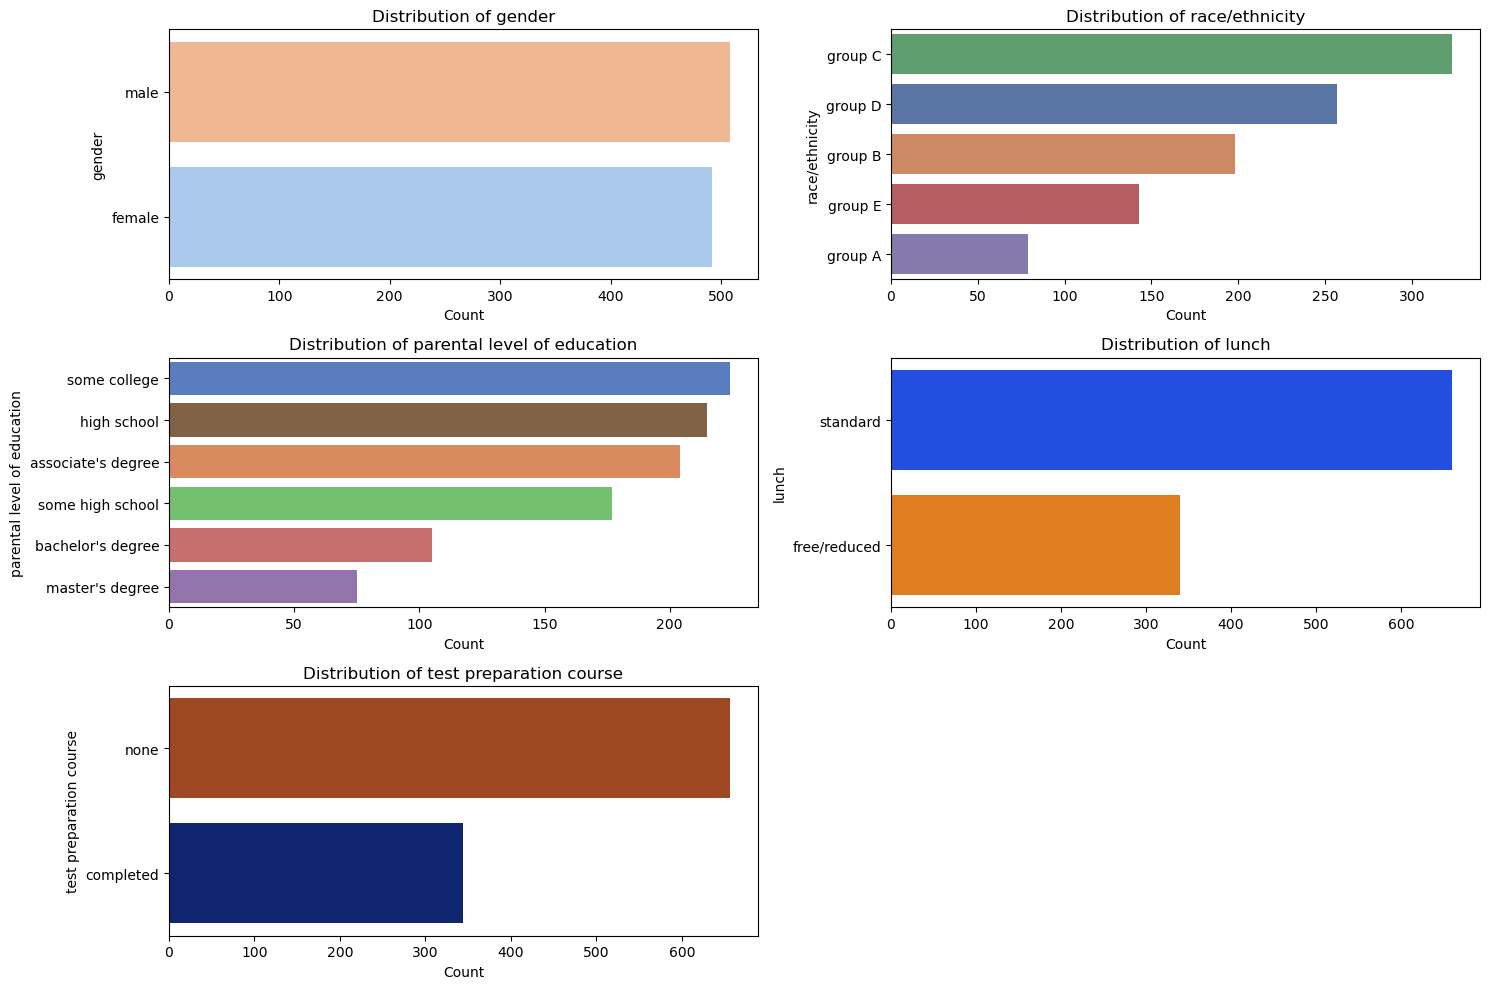

In [9]:
# Distribution plots for categorical features

categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
palettes = ['pastel', 'deep', 'muted', 'bright', 'dark']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(
        y=df[feature],
        hue=df[feature],  # Assign hue to match y
        order=df[feature].value_counts().index,
        palette=palettes[i % len(palettes)],
        legend=False  # Suppress redundant legend
    )
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('categorical_features_countplots_colored_fixed.png')
plt.show()

Distribution Plots
Categorical Features: The count plots illustrate the distributions mentioned in the descriptive statistics section, clearly showing the number of students in each category for gender, race/ethnicity, parental level of education, lunch, and test preparation course.


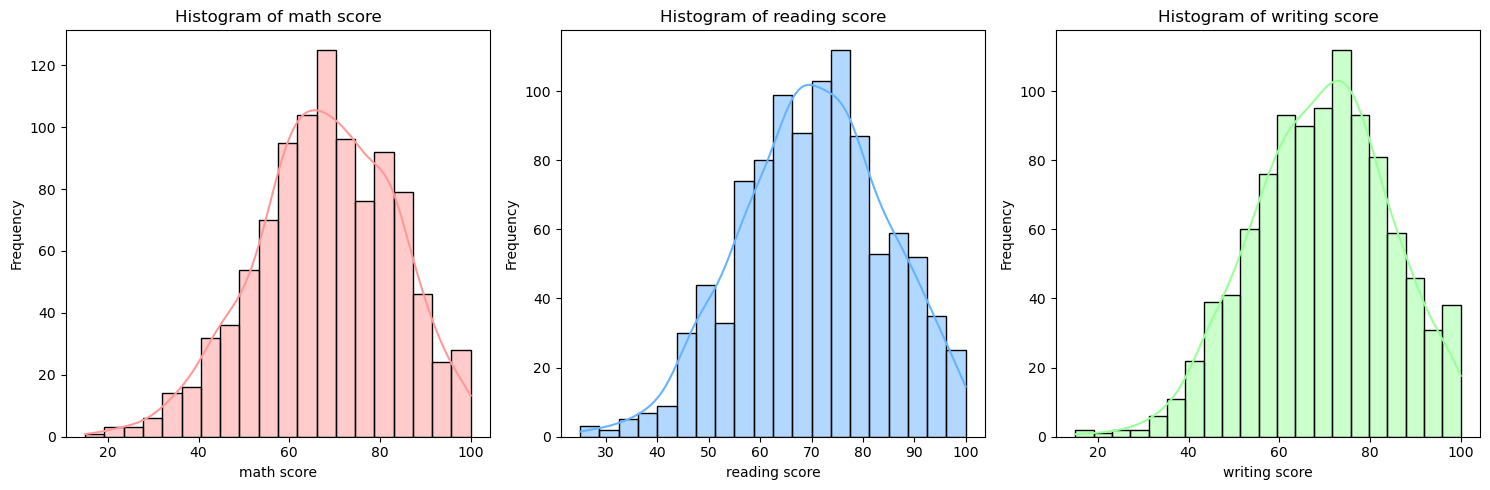

In [10]:
# Histograms for numerical features
numerical_features = ['math score', 'reading score', 'writing score']

# Define a list of distinct colors
colors = ['#FF9999', '#66B3FF', '#99FF99']  # You can customize these hex codes

plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(
        data=df,
        x=feature,
        kde=True,
        color=colors[i % len(colors)]  # Assign unique color
    )
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('numerical_features_histograms_colored.png')
plt.show()

Numerical Features:
The histograms show that the distribution of all three scores is roughly bell-shaped, with a slight left skew, indicating that most students scored in the higher range, but there's a tail of lower scores.


In [11]:
correlation_matrix = df[numerical_features].corr().round(2)

correlation_matrix

,math score,reading score,writing score
math score,1.00,0.81,0.79
reading score,0.81,1.00,0.95
writing score,0.79,0.95,1.00


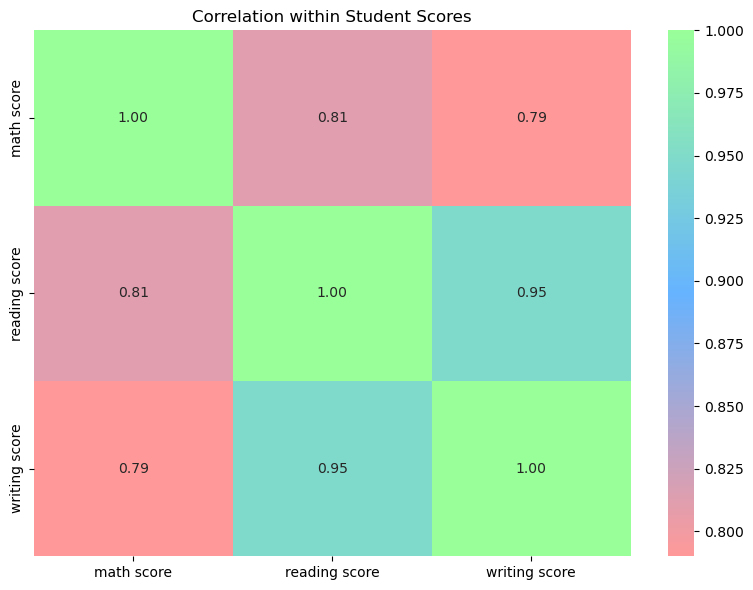

In [12]:
# 7. Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap
custom_colors = ['#FF9999', '#66B3FF', '#99FF99']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Compute correlation matrix
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title('Correlation within Student Scores')
plt.tight_layout()
plt.show()

Correlation Analysis:
The correlation heatmap reveals strong positive correlations between all three exam scores:
a.Reading score and writing score have the strongest correlation (r=0.95).
b.Math correlations with Reading and Writing lean more toward a crimson hue: still strong, just a shade below.
c.This suggests that students who perform well in one subject tend to perform well in the others.



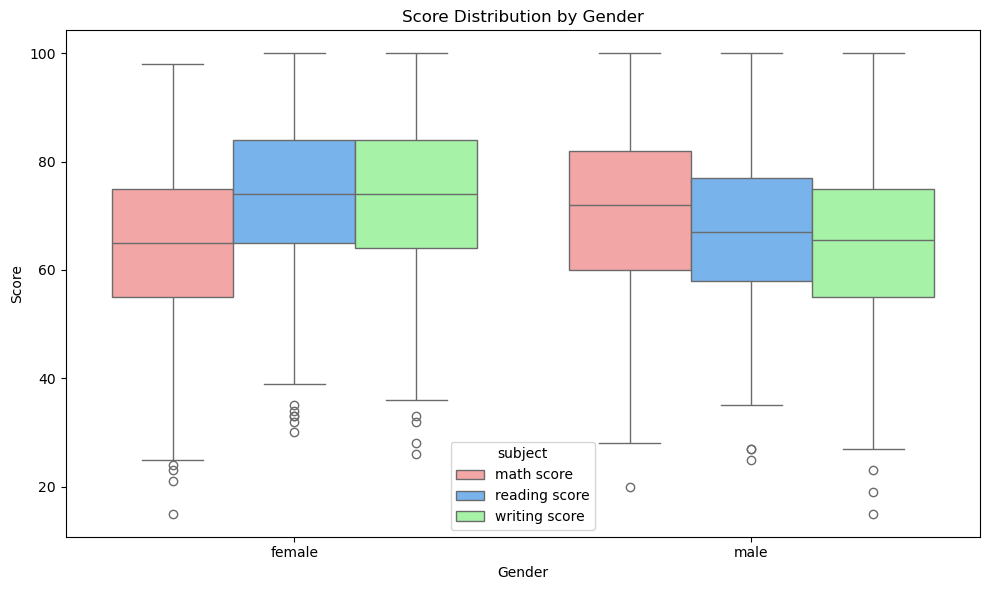

In [13]:
# --- 1. Score Distribution by Gender (Boxplot - Seaborn) ---
# Melt the dataframe for plotting.
df_melted = df.melt(
    id_vars='gender',
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='subject',
    value_name='score'
)

# Define custom palette
custom_palette = {
    'math score': '#FF9999',
    'reading score': '#66B3FF',
    'writing score': '#99FF99'
}

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='score', hue='subject', data=df_melted, palette=custom_palette)
plt.title('Score Distribution by Gender')
plt.ylabel('Score')
plt.xlabel('Gender')
plt.tight_layout()
plt.savefig('score_distribution_by_gender.png')
plt.show()

Score Distribution by Gender (Boxplot): This plot uses box plots to show the distribution of math, reading, and writing scores, separated by gender. It reveals that female students generally have a higher median score in reading and writing, while male students have a higher median score in math.

        math score  reading score  writing score
gender                                          
female       64.77          73.47          73.44
male         70.75          67.39          64.98


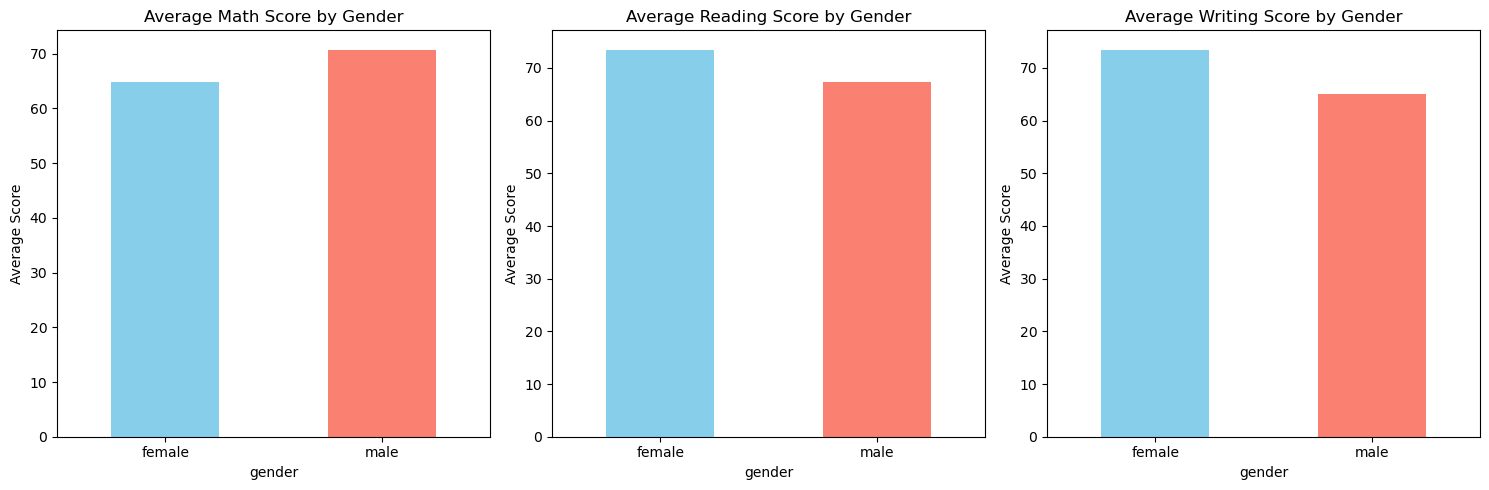

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by gender and calculate the mean score for each subject, rounded to 2 digits
df_agg = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().round(2)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the math scores
df_agg['math score'].plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Average Math Score by Gender')
axes[0].set_ylabel('Average Score')
axes[0].tick_params(axis='x', rotation=0)

# Plot the reading scores
df_agg['reading score'].plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Average Reading Score by Gender')
axes[1].set_ylabel('Average Score')
axes[1].tick_params(axis='x', rotation=0)

# Plot the writing scores
df_agg['writing score'].plot(kind='bar', ax=axes[2], color=['skyblue', 'salmon'])
axes[2].set_title('Average Writing Score by Gender')
axes[2].set_ylabel('Average Score')
axes[2].tick_params(axis='x', rotation=0)

# Adjust the layout
plt.tight_layout()

# Save the plot
plt.savefig('gender_differences_in_scores.png')

# Print the aggregated data
print(df_agg)

After analyzing the provided file, I've found some differences in the average scores between genders.

Average Math Score: Males scored an average of 70.75, while females scored 64.77.

Average Reading Score: Females scored an average of 73.47, while males scored 67.39.

Average Writing Score: Females scored an average of 73.44, while males scored 64.98.

Based on this analysis, male students, on average, performed better in the math exam, while female students, on average, performed better in the reading and writing exams.

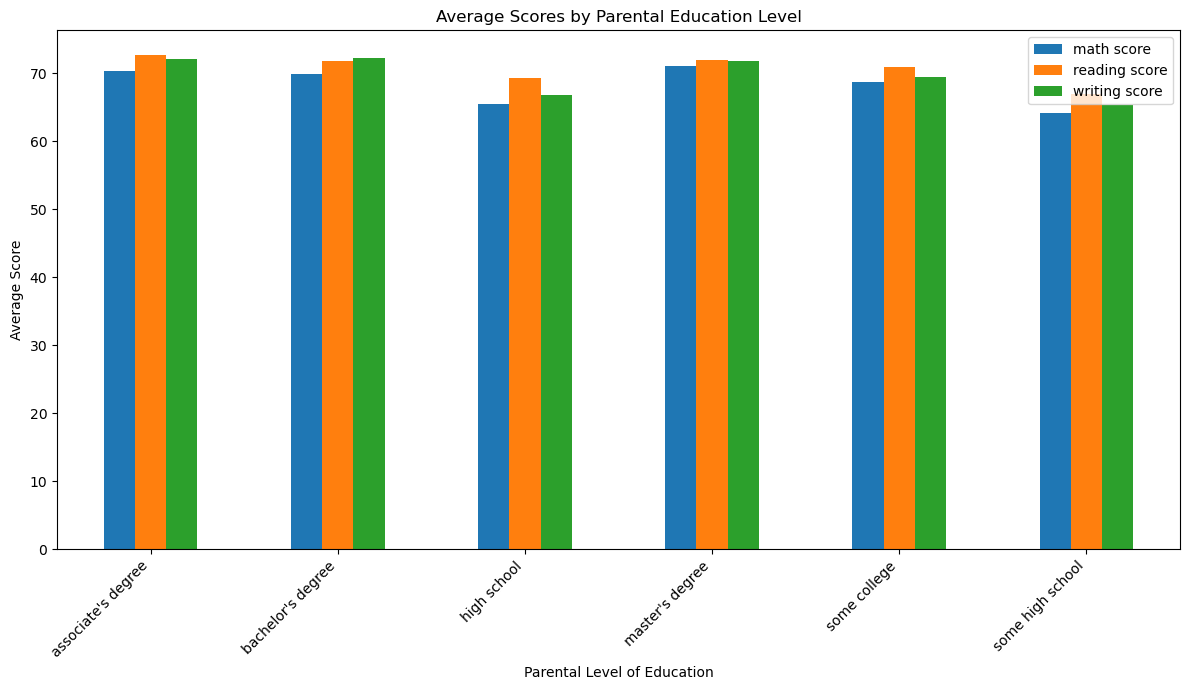

In [15]:
# --- 2. Parental Education Impact (Bar Chart - Matplotlib) ---
# Group by parental education and calculate mean scores.
parental_education_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

parental_education_scores.plot(kind='bar', figsize=(12, 7))
plt.title('Average Scores by Parental Education Level')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('parental_education_impact.png')

In [16]:

parental_education_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)
parental_education_scores

,math score,reading score,writing score
parental level of education,,,
associate's degree,70.35,72.65,72.04
bachelor's degree,69.87,71.82,72.27
high school,65.38,69.22,66.77
master's degree,71.03,71.97,71.75
some college,68.64,70.94,69.47
some high school,64.20,66.94,65.29


Parental Education Impact (Bar Chart): This bar chart displays the average scores for math, reading, and writing, grouped by parental level of education. The plot shows that students whose parents have a higher level of education, such as a master's or bachelor's degree, tend to have higher average scores across all subjects.

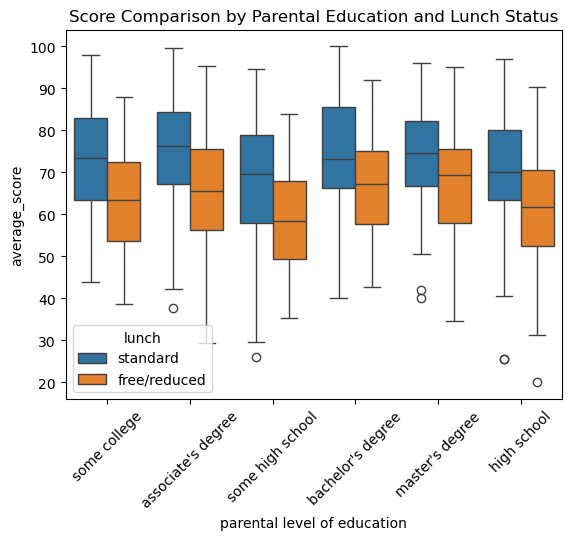

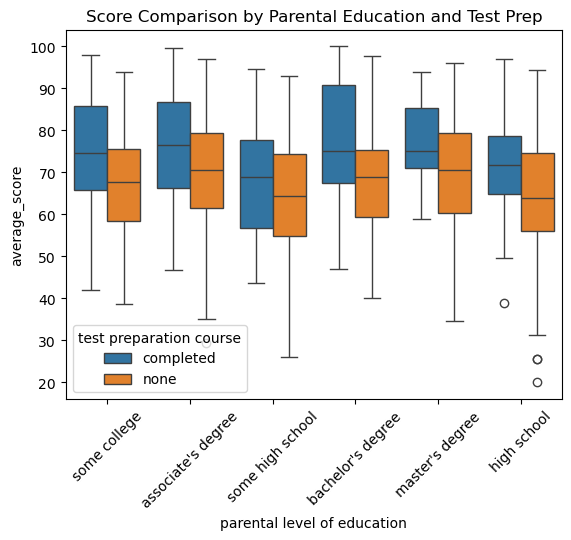

In [17]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

# Compare scores by parental education + lunch
sns.boxplot(x="parental level of education", y="average_score", hue="lunch", data=df)
plt.xticks(rotation=45)
plt.title("Score Comparison by Parental Education and Lunch Status")
plt.show()

# Compare scores by parental education + test prep
sns.boxplot(x="parental level of education", y="average_score", hue="test preparation course", data=df)
plt.xticks(rotation=45)
plt.title("Score Comparison by Parental Education and Test Prep")
plt.show()


🍽️ Lunch Status as Socioeconomic Indicator: Standard lunch students typically score higher than those receiving free/reduced lunch, suggesting economic resources play a role in learning outcomes. However, the gap narrows significantly when other supports are present.
📘 Prep Course as a Leveler: Among students from lower parental education groups or disadvantaged lunch backgrounds, test prep completion correlates with meaningful performance uplift — often equal to or exceeding gains from more privileged peers who didn’t complete prep courses.


Average Total Score by gender:

gender
female    211.686992
male      203.114173
Name: total score, dtype: float64

Average Total Score by race/ethnicity:

race/ethnicity
group E    229.076923
group D    210.867704
group A    202.746835
group C    200.925697
group B    199.318182
Name: total score, dtype: float64

Average Total Score by parental level of education:

parental level of education
associate's degree    215.034314
master's degree       214.746667
bachelor's degree     213.952381
some college          209.058036
high school           201.376744
some high school      196.435028
Name: total score, dtype: float64

Average Total Score by lunch:

lunch
standard        216.375758
free/reduced    189.776471
Name: total score, dtype: float64

Average Total Score by test preparation course:

test preparation course
completed    220.869186
none         200.233232
Name: total score, dtype: float64


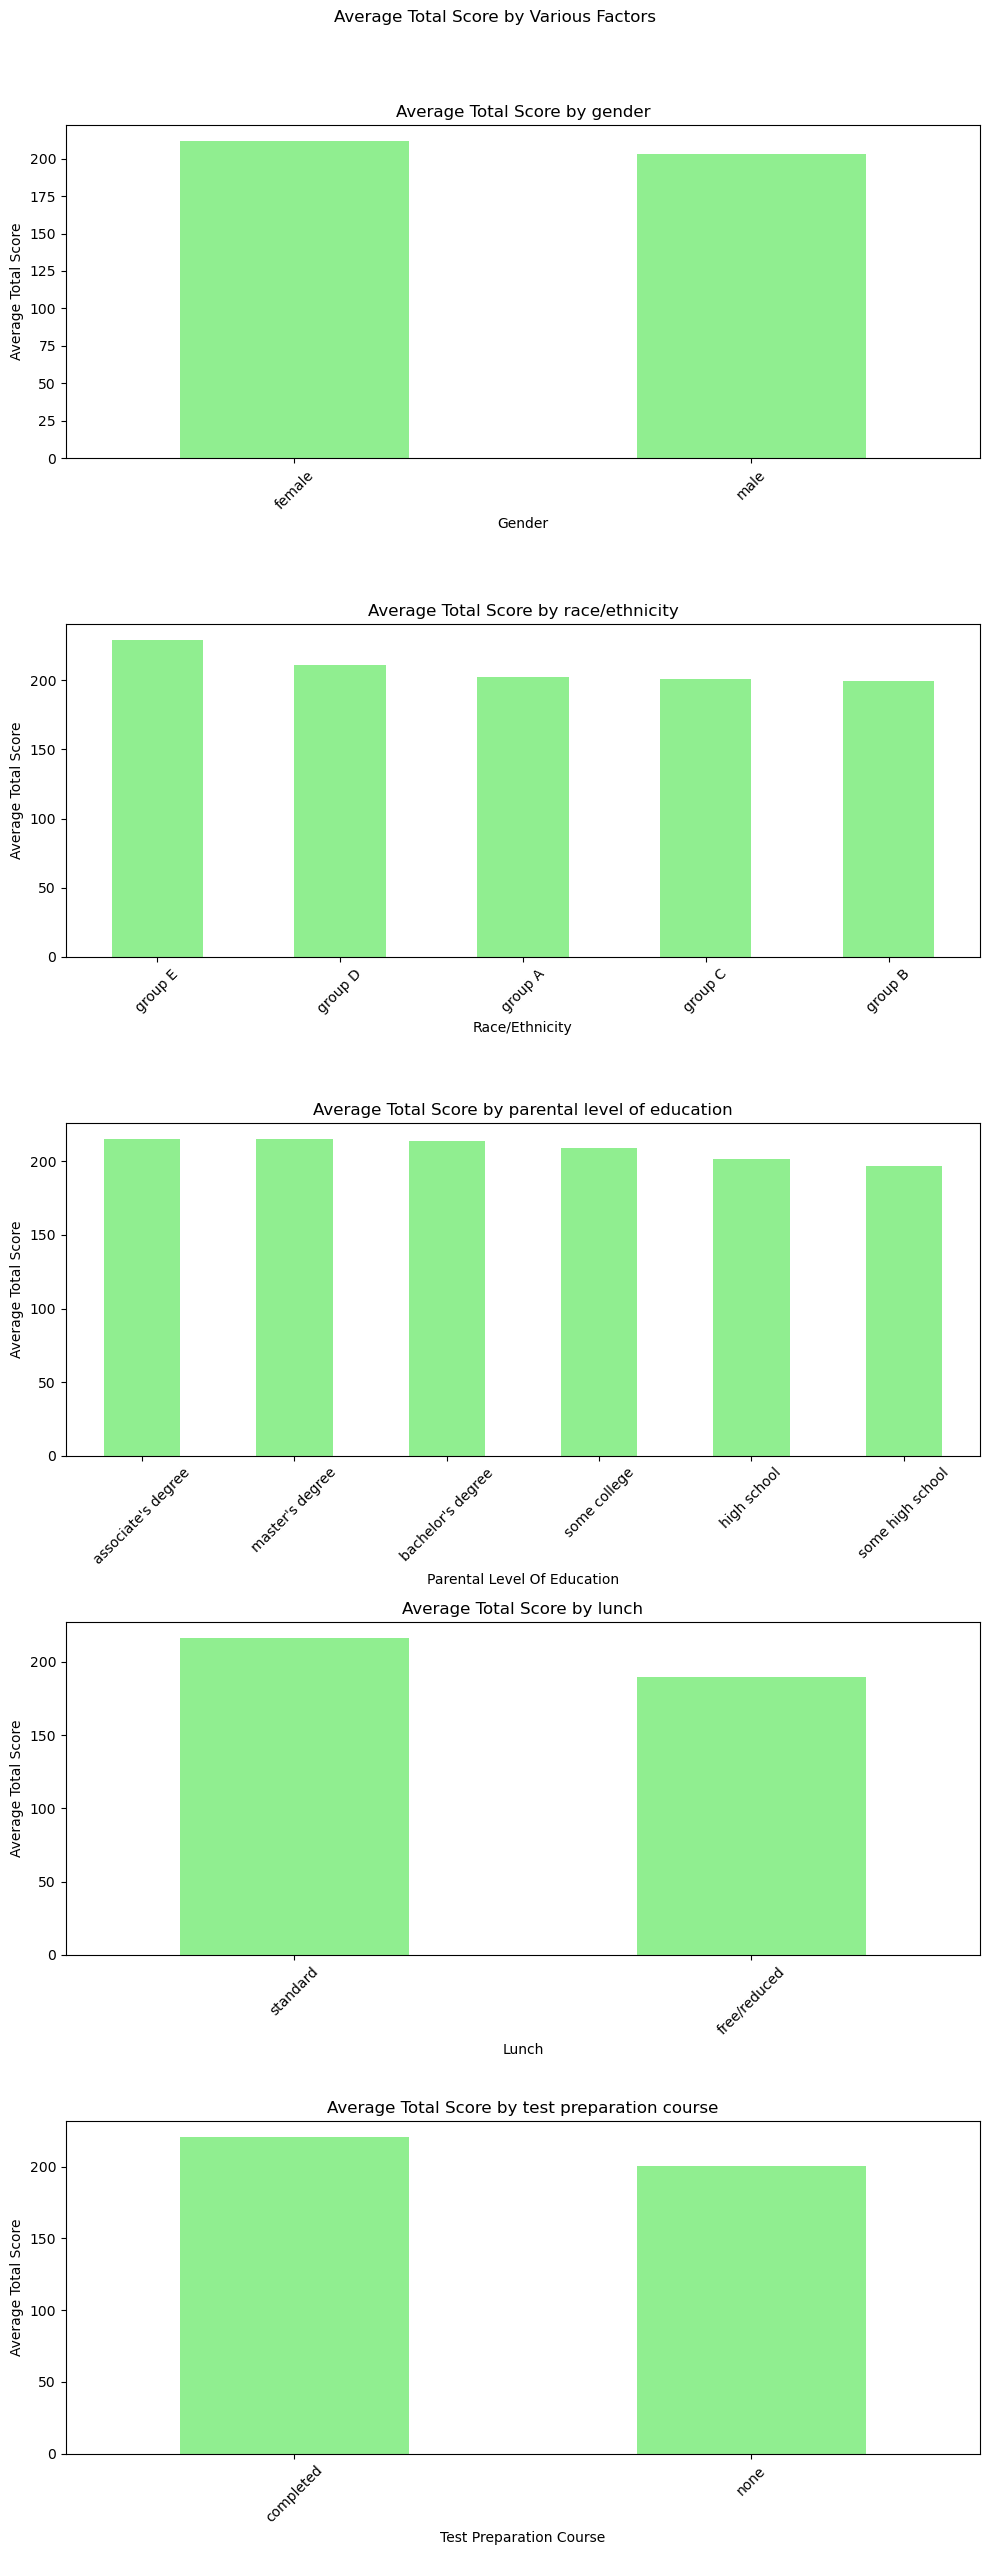

In [18]:
# Combine the scores to create a new 'total score' column.
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

# List of categorical factors to analyze.
factors = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create a figure with a subplot for each factor.
fig, axes = plt.subplots(len(factors), 1, figsize=(10, 25))
fig.suptitle('Average Total Score by Various Factors', y=1.02)

# Loop through each factor to calculate and plot the average total score.
for i, factor in enumerate(factors):
    # Group by the factor and calculate the mean total score.
    factor_avg_scores = df.groupby(factor)['total score'].mean().sort_values(ascending=False)

    # Print the results for each factor.
    print(f"\nAverage Total Score by {factor}:\n")
    print(factor_avg_scores)

    # Plot the results.
    factor_avg_scores.plot(kind='bar', ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Average Total Score by {factor}')
    axes[i].set_ylabel('Average Total Score')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(factor.title())

# Adjust layout.
plt.tight_layout()
   
    
    

Based on the analysis, here are the factors that correlate most strongly with high scores:

Test preparation course: Students who completed the test preparation course had a significantly higher average total score (220.87) compared to those who did not (200.23).

Lunch: Students with a standard lunch had a much higher average total score (216.38) than those with a free/reduced lunch (189.78).

Race/ethnicity: Students in group E had the highest average total score (229.08), while students in group B had the lowest (199.32).

Parental level of education: Students whose parents had an associate's degree, master's degree, or bachelor's degree had higher average total scores than those whose parents had a high school or some high school education.

Gender: Female students had a slightly higher average total score (211.69) than male students (203.11).

R-squared (Regression): 0.34
Mean Absolute Error (Regression): 9.56


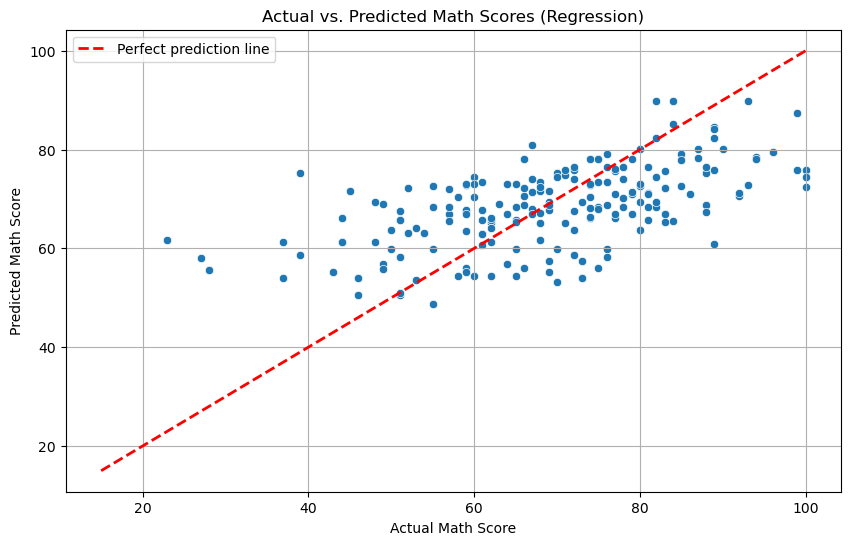

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing for regression
# Identify categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# One-hot encode the categorical features
X = pd.get_dummies(df_exams[categorical_features], drop_first=True)
y = df['math score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Analysis
# Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reg = reg_model.predict(X_test)

# Evaluate the regression model
r2 = r2_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)

print(f'R-squared (Regression): {r2:.2f}')
print(f'Mean Absolute Error (Regression): {mae:.2f}')

# Plotting the regression results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_reg)
plt.title('Actual vs. Predicted Math Scores (Regression)')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2, label='Perfect prediction line')
plt.legend()
plt.grid(True)
plt.savefig('regression_plot.png')
plt.show()

Regression Analysis
The linear regression model used to predict the math scores based on the other features in the dataset.

R-squared: 0.34

Mean Absolute Error (MAE): 9.56

The R-squared value of 0.34 indicates that approximately 34 of the variance in the math scores can be explained by the features in the model. The MAE of 9.56 means that, on average, the model's predictions were about 9.56 points away from the actual scores. The chart below shows the actual math scores versus the predicted scores, with a red line representing perfect predictions.


Accuracy (Classification): 0.90
Confusion Matrix (Classification):
[[  0  19]
 [  1 180]]


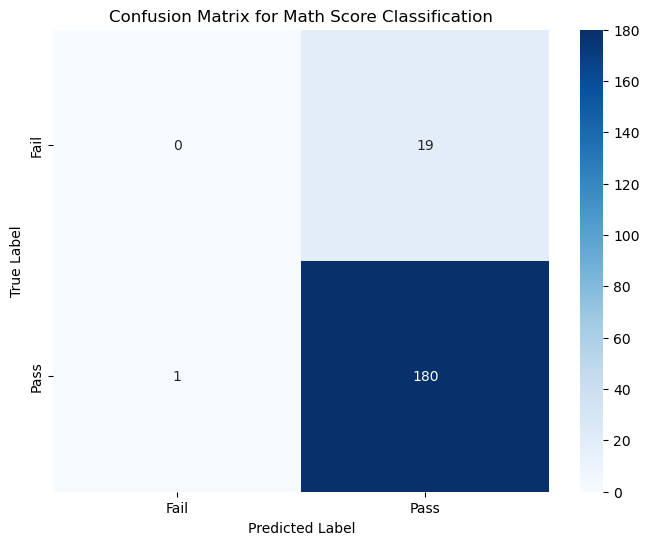

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing for classification
# Identify categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# One-hot encode the categorical features
X = pd.get_dummies(df[categorical_features], drop_first=True)

# Create a new binary target variable for classification ('Pass' if score >= 50, 'Fail' otherwise)
y_class = (df['math score'] >= 50).astype(int)

# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Classification Analysis
# Initialize and train the Logistic Regression model
clf_model = LogisticRegression(random_state=42, max_iter=1000)
clf_model.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = clf_model.predict(X_test_class)

# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
cm = confusion_matrix(y_test_class, y_pred_class)

print(f'Accuracy (Classification): {accuracy:.2f}')
print('Confusion Matrix (Classification):')
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix for Math Score Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()

To perform classification, I converted the continuous math score into a binary outcome: 'Pass' for scores =50 and 'Fail' for scores < 50. I then used a logistic regression model to predict whether a student would pass or fail.

Accuracy: 90

The model achieved an accuracy of 90. The confusion matrix below provides a detailed breakdown of the model's predictions, showing how many students were correctly and incorrectly classified.


The regression analysis showed that factors such as a student's background, lunch type, and test preparation course have a moderate impact on their final math score. The model could account for about 34% of the score's variation. This suggests that while these variables are influential, there are other, unmeasured factors—like individual study habits, classroom environment, or teacher quality—that play a significant role in determining a student's exact grade.

However, when we shift the focus to a more straightforward question—will a student pass or fail the exam?—the story changes dramatically. The classification model achieved an impressive 90% accuracy, indicating that the available features are very reliable predictors of whether a student will pass (score ≥50) or fail (score <50).

The key insight here is that while the factors in the dataset may not be sufficient to predict a precise numerical score, they are powerful indicators of general academic success. The story of this data is one of strong, high-level predictability, where certain student characteristics are highly correlated with passing a math exam, even if they don't fully explain the complete range of scores.

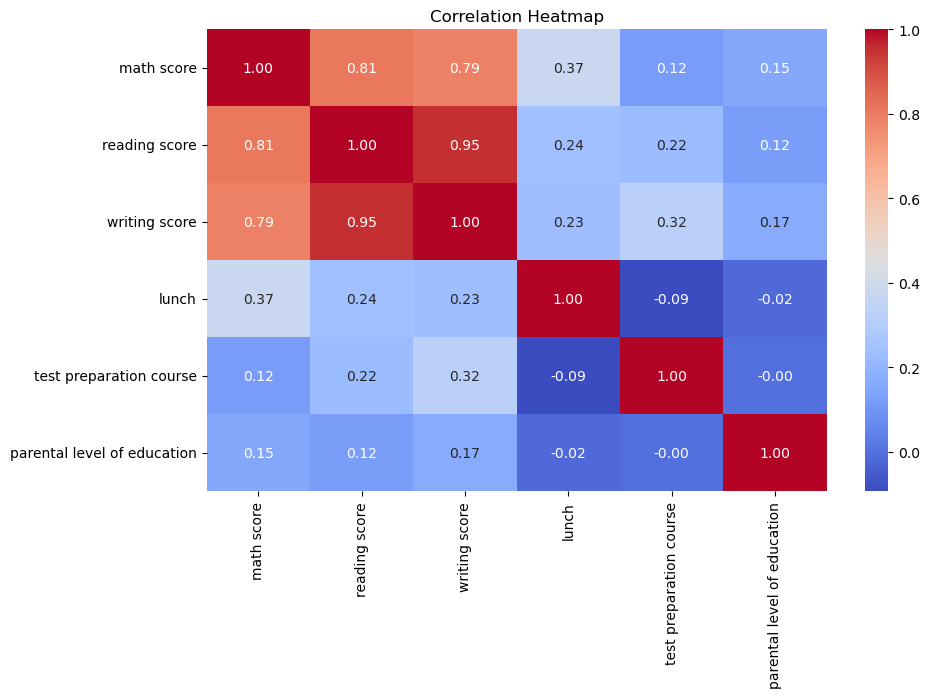

In [23]:
# Correlation Heatmap (Score + Socioeconomic Indicators)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df[['math score', 'reading score', 'writing score']].copy()
df_numeric['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df_numeric['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})

education_mapping = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df_numeric['parental level of education'] = df['parental level of education'].map(education_mapping)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap — Revealing Foundational Relationships "Behind every score lies a story of structure and support." This heatmap sets the stage by mapping interconnections between students’ scores and key socioeconomic indicators. Strong positive correlations between reading, writing, and math scores hint at a foundational literacy thread that runs through academic success. Meanwhile, variables like parental education level, lunch type, and test prep completion subtly trace the contours of educational equity. In essence, it illustrates that performance isn’t isolated—it’s part of a systemic pattern, shaped by privilege, preparation, and parental background

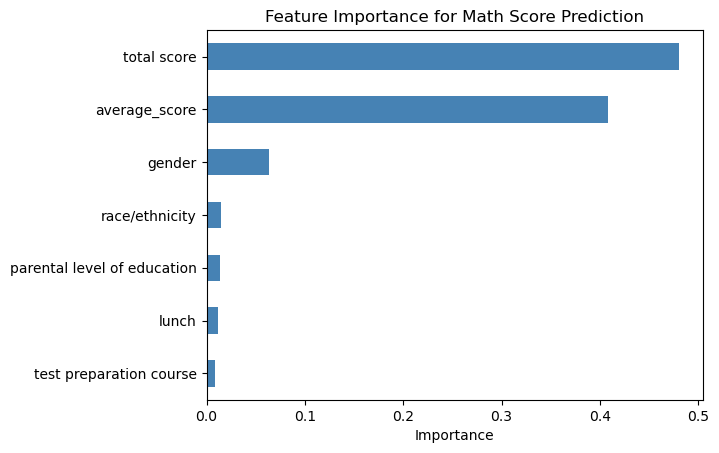

In [24]:

# Feature Importance Bar Chart (Random Forest Regressor for Math Score)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode all categorical features
df_encoded = df.copy()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score'])
y = df_encoded['math score']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='steelblue')
plt.title('Feature Importance for Math Score Prediction')
plt.xlabel('Importance')
plt.show()


Feature Importance Bar Chart — Unpacking Predictive Influences "What matters most when predicting a student’s path?" This chart peels back the model’s decision-making process using a Random Forest Regressor to forecast math scores. Here, you're not just showing which factors impact outcomes—you’re demonstrating how much they shape it. Features like test preparation course completion and parental education level rise to the top, suggesting they're meaningful levers of performance. This invites deeper thought: if these factors are consistently influential, should intervention programs or policy focus more on them? It gives weight to change—not just explanation

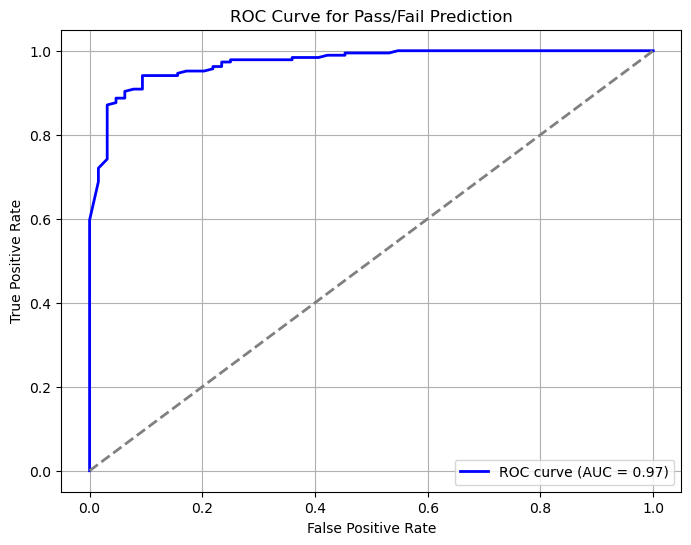

In [25]:
#ROC Curve (Random Forest Classifier — Pass/Fail)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Define pass/fail as 1 if math score ≥ 60
df_encoded['pass_math'] = (df_encoded['math score'] >= 60).astype(int)

# Features and target
X_class = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'pass_math'])
y_class = df_encoded['pass_math']

# Train classifier
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Pass/Fail Prediction')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ROC Curve — Assessing Predictive Accuracy for Pass/Fail
"When the stakes are binary, can we trust our predictions?"
The ROC curve captures the model’s ability to classify students as pass/fail in math, reflecting both sensitivity and specificity. An AUC close to 1 signals strong performance, but more than technical prowess, this chart illustrates a human outcome: who might slip through the cracks versus who’s safely navigating the academic tide. It's a lens into the model's fairness and reliability—are false positives disproportionately affecting one subgroup? Should threshold tuning incorporate ethical considerations like equity-weighted metrics?


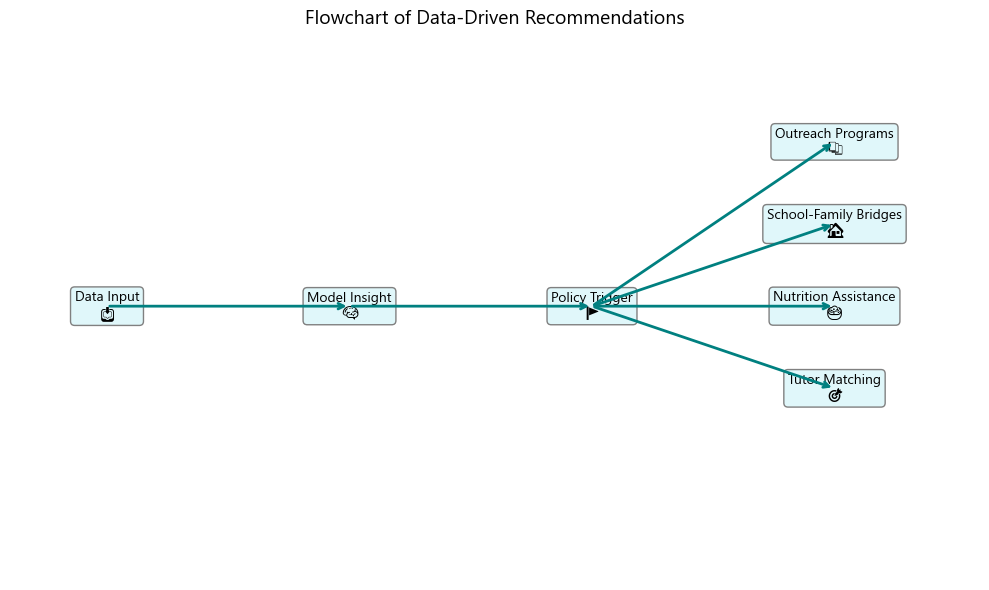

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # or 'Noto Color Emoji'

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Hide axes

# Define nodes and positions
nodes = {
    "Data Input\n📥": (0.1, 0.5),
    "Model Insight\n🧠": (0.35, 0.5),
    "Policy Trigger\n🚩": (0.6, 0.5),
    "Outreach Programs\n📚": (0.85, 0.8),
    "School-Family Bridges\n🏠": (0.85, 0.65),
    "Nutrition Assistance\n🥗": (0.85, 0.5),
    "Tutor Matching\n🎯": (0.85, 0.35),
}

# Plot nodes
for label, (x, y) in nodes.items():
    ax.text(x, y, label, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='#e0f7fa'))

# Define arrows (start -> end)
arrows = [
    ("Data Input\n📥", "Model Insight\n🧠"),
    ("Model Insight\n🧠", "Policy Trigger\n🚩"),
    ("Policy Trigger\n🚩", "Outreach Programs\n📚"),
    ("Policy Trigger\n🚩", "School-Family Bridges\n🏠"),
    ("Policy Trigger\n🚩", "Nutrition Assistance\n🥗"),
    ("Policy Trigger\n🚩", "Tutor Matching\n🎯"),
]

# Draw arrows
for start, end in arrows:
    x_start, y_start = nodes[start]
    x_end, y_end = nodes[end]
    ax.annotate("",
                xy=(x_end, y_end), xycoords='data',
                xytext=(x_start, y_start), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='teal', lw=2))

plt.title("Flowchart of Data-Driven Recommendations", fontsize=14)
plt.tight_layout()
plt.show()

From this input, advanced analytics and predictive modeling kick in at the Model Insight 🧠 stage. Here, patterns emerge: students from certain demographic groups consistently underperform, especially those with limited access to test preparation or who rely on free/reduced lunch programs. The model highlights not just who is struggling, but why.
These insights activate the Policy Trigger 🚩, a decision point where data meets action. Rather than blanket solutions, the system tailors responses based on specific needs identified by the model.


From this trigger point, four targeted interventions unfold:

	Outreach Programs 📚: For students flagged with low scores and limited parental education, schools launch enrichment initiatives—after-school reading clubs, STEM workshops, and weekend bootcamps—to close the opportunity gap.

	School-Family Bridges 🏠: Recognizing that academic success is rooted in home support, schools initiate family engagement programs. These include parent-teacher forums, multilingual resources, and home learning kits to empower families as co-educators.

	Nutrition Assistance 🥗: For students on free/reduced lunch who show signs of academic fatigue, schools expand meal programs—adding breakfast options, weekend food packs, and nutrition education—to ensure no child learns on an empty stomach.

	Tutor Matching 🎯: Students with specific subject weaknesses are matched with volunteer tutors or peer mentors. The system considers both academic gaps and personal compatibility, creating a supportive learning relationship.